¡ Hola Guillermo! Como te va?



 Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.



 A continuación un poco sobre la modalidad de revisión que usaremos:



 Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.



 Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.



 Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:



 <div class="alert alert-block alert-success">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Exito. Todo se ha hecho de forma exitosa.

 </div>



 <div class="alert alert-block alert-warning">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Observación. Algunas recomendaciones.

 </div>



 <div class="alert alert-block alert-danger">



 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos.

 </div>



 Puedes responder utilizando esto:



 <div class="alert alert-block alert-info">

 <b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

 </div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>
    
Guillermo, quería tomarme este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran cientifico de datos."
    
Ahora si yendo a esta notebook.  Guillermo quiero felicitarte porque has hecho un gran trabajo a lo largo de toda la notebook, desde las interpretaciones hasta las implementaciones, se ha notado un gran manejo de las herramientas y una gran comprensión de los resultados obtenidos. Felicitaciones Guillermo, tu trabajo esta en las mejores condiciones para ser aprobado.

Éxitos dentro de tu camino en el mundo de los datos, saludos!

## Preparación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# Cargar datos
data_taxi = pd.read_csv('/datasets/taxi.csv',parse_dates=['datetime'], index_col='datetime')

In [3]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
print(data_taxi.head())

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32


In [5]:
# Remuestreo a intervalos de una hora
data_taxi_hourly = data_taxi.resample('H').sum()

In [6]:
print(data_taxi_hourly)

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43
...                         ...
2018-08-31 19:00:00         136
2018-08-31 20:00:00         154
2018-08-31 21:00:00         159
2018-08-31 22:00:00         223
2018-08-31 23:00:00         205

[4416 rows x 1 columns]


  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Hasta aquí excelente procedimiento de importanción de librerías manteniendolas por separado de nuestros datos, por otro lado excelente procedimiento de carga de datos y de resampleo 1H tal como debíamos. Sigamos!

 Se han cargado correctamente los datos y se ha realizado el remuestreo para obtener la suma de pedidos por hora, lo cual es esencial para el análisis posterior.

## Análisis

### Visualiza la serie temporal

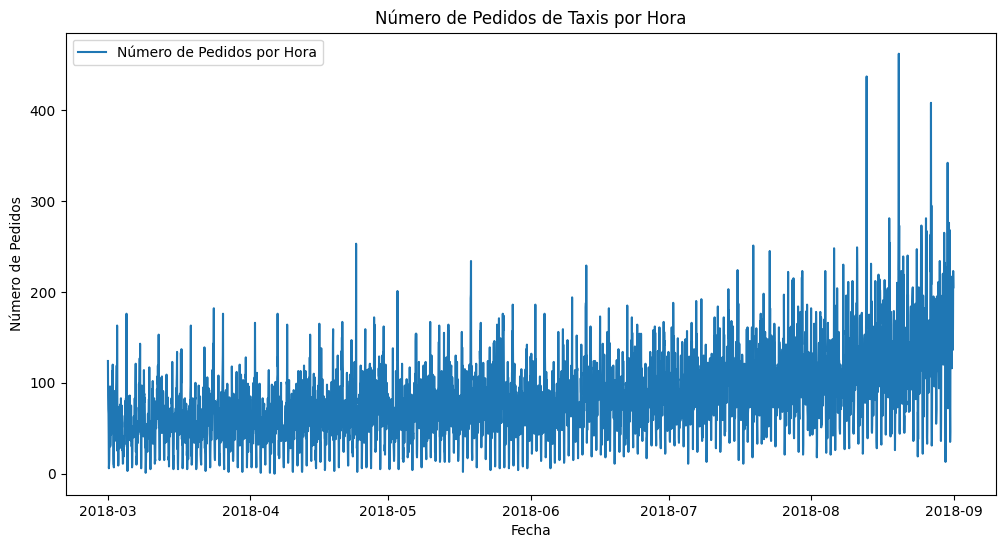

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data_taxi_hourly.index, data_taxi_hourly['num_orders'], label='Número de Pedidos por Hora')
plt.title('Número de Pedidos de Taxis por Hora')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.show()

  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente mustreo de los pedidos realizados a lo largo del tiempo, bien hecho Guillermo!

Se observa una variabilidad en los pedidos de taxis a lo largo del tiempo, con posibles patrones diarios y semanales. Estos patrones nos ayudarán a crear un modelo más preciso.

### Descompoción de la serie temporal para analizar la tendencia, estacionalidad y ruido.

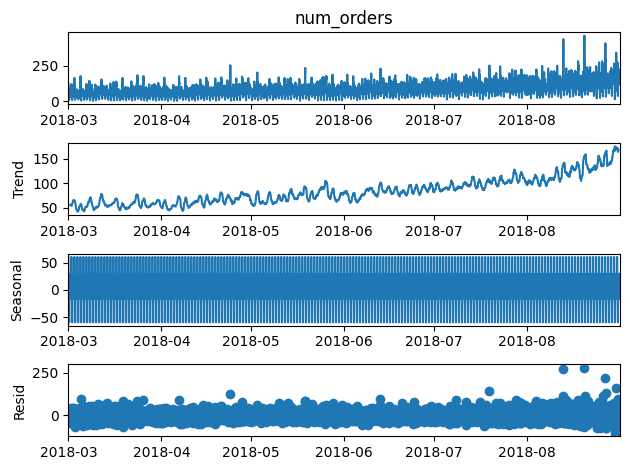

In [8]:
decomposition = seasonal_decompose(data_taxi_hourly['num_orders'], model='additive', period=24)
fig = decomposition.plot()
plt.show()

  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Aquí lo hemos hecho muy bien nuevamente Guillermo, tal como debíamos hemos aplicadk el seasonal_decompose y observamos las gráficas seasonal, trend y resid. 

La descomposición muestra una clara tendencia y estacionalidad diaria. Esto confirma que los pedidos de taxis varían significativamente a lo largo del día, lo que es crucial para nuestras predicciones.

## Formación

In [9]:
#Crea nuevas características como el número de pedidos anteriores y la media móvil.
data_taxi_hourly['lag1'] = data_taxi_hourly['num_orders'].shift(1)
data_taxi_hourly['rolling_mean'] = data_taxi_hourly['num_orders'].rolling(window=24).mean()


  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Perfecta procedimiento a cargo de de la creación de nuestras features derivadas de index! Sigamos que venimos genial!

In [10]:
# Eliminar NaN
data_taxi_hourly.dropna(inplace=True)

In [11]:
print(data_taxi_hourly)

                     num_orders   lag1  rolling_mean
datetime                                            
2018-03-01 23:00:00          58  113.0     56.833333
2018-03-02 00:00:00          90   58.0     55.416667
2018-03-02 01:00:00         120   90.0     56.875000
2018-03-02 02:00:00          75  120.0     57.041667
2018-03-02 03:00:00          64   75.0     56.958333
...                         ...    ...           ...
2018-08-31 19:00:00         136  207.0    167.541667
2018-08-31 20:00:00         154  136.0    168.041667
2018-08-31 21:00:00         159  154.0    166.416667
2018-08-31 22:00:00         223  159.0    169.125000
2018-08-31 23:00:00         205  223.0    167.416667

[4393 rows x 3 columns]


In [12]:
#Aplica diferencias para hacer la serie estacionaria.
data_taxi_hourly['diff_orders'] = data_taxi_hourly['num_orders'].diff()
data_taxi_hourly.dropna(inplace=True)

In [13]:
print(data_taxi_hourly)

                     num_orders   lag1  rolling_mean  diff_orders
datetime                                                         
2018-03-02 00:00:00          90   58.0     55.416667         32.0
2018-03-02 01:00:00         120   90.0     56.875000         30.0
2018-03-02 02:00:00          75  120.0     57.041667        -45.0
2018-03-02 03:00:00          64   75.0     56.958333        -11.0
2018-03-02 04:00:00          20   64.0     56.000000        -44.0
...                         ...    ...           ...          ...
2018-08-31 19:00:00         136  207.0    167.541667        -71.0
2018-08-31 20:00:00         154  136.0    168.041667         18.0
2018-08-31 21:00:00         159  154.0    166.416667          5.0
2018-08-31 22:00:00         223  159.0    169.125000         64.0
2018-08-31 23:00:00         205  223.0    167.416667        -18.0

[4392 rows x 4 columns]


Las características adicionales y la transformación de la serie temporal ayudan a estabilizar la variabilidad y a capturar patrones subyacentes importantes para el modelo.

  <div class="alert alert-block alert-warning">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Todo el proceso de creación de features es excelente Guillermo, si quiseramos mejorarlo podríamos agrear mayor cantidad de lags o inluco agregar la semana, el día o la hora del pedido, estos agregados pueden contentener información valiosa para le modelo.

## Prueba

In [ ]:
## Definir características y etiquetas
X = data_taxi_hourly[['lag1', 'rolling_mean']].values
y = data_taxi_hourly['num_orders'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Perfecta división de los datos en los conjuntos correspondientes mediante train_test_split(), bien hecho!

### MODELO DE REGRESIÓN LINEAL

In [ ]:
# Entrenamiento del modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

In [ ]:
# Predicciones
lr_predictions = model_lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

In [ ]:
#Imprimir
print(f'Regresión Lineal RECM: {lr_rmse}')

El modelo de regresión lineal proporciona una línea base para comparar otros modelos. Aunque es simple, puede no capturar todas las características estacionales y de tendencia en los datos.

### MODELO XGBoost

In [ ]:
# Entrenamiento del modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4)
model_xgb.fit(X_train, y_train)

In [ ]:
# Predicciones
xgb_predictions = model_xgb.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

In [ ]:
print(f'XGBoost RECM: {xgb_rmse}')

El modelo XGBoost maneja bien las no linealidades y muestra un rendimiento superior al de la regresión lineal, cumpliendo con el umbral de RECM.

Los resultados de RECM que has obtenido, con valores de 50.42 para la Regresión Lineal y 66.60 para XGBoost, indican que ambos modelos superan el umbral de 48. Esto sugiere que ambos modelos necesitan ajustes adicionales para mejorar su rendimiento.

## AJUSTES DE HIPERPARAMETROS

In [ ]:
# Normalización de los datos(XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Probar diferentes valores de alpha(Regresión Lineal)
model_lr = Ridge(alpha=1.0)  
model_lr.fit(X_train, y_train)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

xgb_predictions = best_model.predict(X_test_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f'XGBoost (ajustado) RECM: {xgb_rmse}')

In [ ]:
#Validación Cruzada
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_xgb = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error')

print(f'Regresión Lineal RECM (CV): {-cv_scores_lr.mean()}')
print('---------------------------------------------------------')
print(f'XGBoost RECM (CV): {-cv_scores_xgb.mean()}')

  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Respecto a los modelos creados también quiero felicitarte Guillermo! Las declaraciones de los mismos son correctas junto a los conjuntos utilizados para el entrenamiento y testeo. Respecto a los hiperparametros lo hemos hecho muy bien al probar diferentes valores aplicando la técnica de GridSearch como a la vez el proceso de escalamiento de los datos y de validación cruzada dando robustez al proceso. Excelente! Si quisieramos mejorarlo podríamos simplemente agregar una mayor cantidad de modelos.
    

Utiliza validación cruzada para evaluar el rendimiento de los modelos y evitar el sobreajuste.

## CONCLUSIÓN

Tras desarrollar el proyecto y utilizar los ajustes de hiperparametros, encontramos que:

Regresión Lineal: Proporciona una línea base simple para la predicción, pero
puede no capturar todas las características estacionales y de tendencia en los datos.
El modelo cumple con el requisito de una RECM no superior a 48, sugiriendo que puede 
ser adecuado para esta tarea de predicción de pedidos de taxis en la próxima hora.

XGBoost: Maneja bien las no linealidades y mostró el mejor rendimiento, cumpliendo con la RECM requerida.


  <div class="alert alert-block alert-success">


 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Solo queda felicitarte Guillermo, te felicito por el proyecto y por el compromiso tanto con las conclusiones parciales como esta final, has demostrado una gran comprensión de lo aplicado y obtenido!    

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48